ANN Clasificatoria con dataset dataset_186_satimage

In [1]:
# Funciones para el procesamiento de los datos

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
Min_Max = preprocessing.MinMaxScaler()
Ordinal =preprocessing.OrdinalEncoder()


def one_hot_cols(df,cols_to_one):
    one_hot=pd.get_dummies(df,cols_to_one,columns=cols_to_one)
    return one_hot


def fit_cols(df, cols_to_fit,fit_function ):
    for col in cols_to_fit:
        df[col] = pd.DataFrame(fit_function.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df


def split_Dataset(mypandas, cols_for_Y,size=0.2,state=1):
    
    X =  mypandas.drop(cols_for_Y, axis=1)
    Y = mypandas[cols_for_Y]
    X.head()
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=size, random_state=state)
    return X_train.to_numpy(), X_test.to_numpy(), Y_train.to_numpy(), Y_test.to_numpy()

In [2]:
data_origin = pd.read_csv(r'../3_Normalización/datasets/dataset_186_satimage.csv')
dataset = fit_cols(data_origin, data_origin.columns, Min_Max)
dataset = one_hot_cols(dataset, ['class'])
# dataset.head(20)
# dataset.describe()

In [3]:
X_train, X_test, Y_train, Y_test = split_Dataset(dataset, list(dataset.columns)[-6:])
print(np.shape(X_train),np.shape(Y_train))
print(np.shape(X_test),np.shape(Y_test))

(5144, 36) (5144, 6)
(1286, 36) (1286, 6)


In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop



def Show_History(History):
    # summarize history for accuracy
    plt.plot(History.history['accuracy'])
    plt.plot(History.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(History.history['loss'])
    plt.plot(History.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

np.random.seed(7)



Adam=optimizers.Adam(lr=0.05)
Sgd=optimizers.SGD(lr=0.01)

In [26]:
# Buenos resultados 
# accuracy 88% (epochs 100, batch_size 25)
# accuracy 90% (epochs 150, batch_size 5)
# accuracy 90% (epochs 200, batch_size 25)
# accuracy 92% (epochs 400, batch_size 25)
# accuracy 91% (epochs 600, batch_size 25) ya tiene un poco de overfitting
def Model1():
    model = Sequential()
    model.add(Dense(20,input_dim=36,activation='relu'))
    model.add(Dense(15,activation='relu'))
    
    
    model.add(Dense(6,activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

# Añadimos una capa al modelo anterior cambiando el numero de neuronas por capa
# accuracy 89% (epochs 100, batch_size 25)
# accuracy 91% (epochs 200, batch_size 25) similar al anterior aunque hay un poco de overfitting
# accuracy 94% val 91%(epochs 400, batch_size 25) se nota más el overfitting
def Model2():
    model = Sequential()
    model.add(Dense(32,input_dim=36,activation='relu'))
    model.add(Dense(18,activation='relu'))
    model.add(Dense(12,activation='relu'))
    
    model.add(Dense(6,activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

# Añadimos una capa dropout para ver si podemos mejorar el modelo sin overfitting
# accuracy 91% (epochs 400, batch_size 25) no hay overfitting pero no ha mejorado el modelo
def Model3():
    model = Sequential()
    model.add(Dense(32,input_dim=36,activation='relu'))
    model.add(Dense(18,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(12,activation='relu'))
    
    model.add(Dense(6,activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


# Probamos el primer modelo con otro optimizador
# accuracy 89% (epochs 400, batch_size 25) obtenemos peores resultados
def Model4():
    model = Sequential()
    model.add(Dense(20,input_dim=36,activation='relu'))
    model.add(Dense(15,activation='relu'))
    
    
    model.add(Dense(6,activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=Sgd,
                  metrics=['accuracy'])
    return model


M=Model4()

Epoch 1/400
206/206 [==============================] - 1s 2ms/step - loss: 1.6794 - accuracy: 0.4153 - val_loss: 1.4337 - val_accuracy: 0.6143
Epoch 2/400
206/206 [==============================] - 0s 1ms/step - loss: 1.3747 - accuracy: 0.5870 - val_loss: 1.1827 - val_accuracy: 0.7131
Epoch 3/400
206/206 [==============================] - 0s 2ms/step - loss: 1.1347 - accuracy: 0.6977 - val_loss: 1.0072 - val_accuracy: 0.6921
Epoch 4/400
206/206 [==============================] - 0s 2ms/step - loss: 0.9879 - accuracy: 0.7050 - val_loss: 0.8876 - val_accuracy: 0.7201
Epoch 5/400
206/206 [==============================] - 0s 2ms/step - loss: 0.8567 - accuracy: 0.7355 - val_loss: 0.8007 - val_accuracy: 0.7442
Epoch 6/400
206/206 [==============================] - 0s 2ms/step - loss: 0.7983 - accuracy: 0.7428 - val_loss: 0.7280 - val_accuracy: 0.7760
Epoch 7/400
206/206 [==============================] - 0s 1ms/step - loss: 0.7134 - accuracy: 0.7820 - val_loss: 0.6694 - val_accuracy: 0.7970

Epoch 58/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3843 - accuracy: 0.8425 - val_loss: 0.3730 - val_accuracy: 0.8554
Epoch 59/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3759 - accuracy: 0.8491 - val_loss: 0.3728 - val_accuracy: 0.8476
Epoch 60/400
206/206 [==============================] - 0s 1ms/step - loss: 0.3894 - accuracy: 0.8362 - val_loss: 0.3847 - val_accuracy: 0.8523
Epoch 61/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8408 - val_loss: 0.3635 - val_accuracy: 0.8554
Epoch 62/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8451 - val_loss: 0.3851 - val_accuracy: 0.8406
Epoch 63/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3686 - accuracy: 0.8509 - val_loss: 0.3623 - val_accuracy: 0.8468
Epoch 64/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3697 - accuracy: 0.8508 - val_loss: 0.3634 - val_accuracy:

Epoch 115/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3510 - accuracy: 0.8639 - val_loss: 0.3485 - val_accuracy: 0.8585
Epoch 116/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3503 - accuracy: 0.8560 - val_loss: 0.3704 - val_accuracy: 0.8398
Epoch 117/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3710 - accuracy: 0.8514 - val_loss: 0.3459 - val_accuracy: 0.8569
Epoch 118/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3243 - accuracy: 0.8741 - val_loss: 0.3522 - val_accuracy: 0.8600
Epoch 119/400
206/206 [==============================] - 0s 1ms/step - loss: 0.3390 - accuracy: 0.8617 - val_loss: 0.3454 - val_accuracy: 0.8585
Epoch 120/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.8621 - val_loss: 0.3474 - val_accuracy: 0.8561
Epoch 121/400
206/206 [==============================] - 0s 1ms/step - loss: 0.3481 - accuracy: 0.8640 - val_loss: 0.3542 - val_ac

206/206 [==============================] - 0s 2ms/step - loss: 0.3312 - accuracy: 0.8722 - val_loss: 0.3262 - val_accuracy: 0.8600
Epoch 172/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.8714 - val_loss: 0.3278 - val_accuracy: 0.8631
Epoch 173/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.8747 - val_loss: 0.3224 - val_accuracy: 0.8616
Epoch 174/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3267 - accuracy: 0.8732 - val_loss: 0.3217 - val_accuracy: 0.8616
Epoch 175/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3302 - accuracy: 0.8675 - val_loss: 0.3265 - val_accuracy: 0.8647
Epoch 176/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3430 - accuracy: 0.8646 - val_loss: 0.3277 - val_accuracy: 0.8593
Epoch 177/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3231 - accuracy: 0.8685 - val_loss: 0.3255 - val_accuracy: 0.8740

206/206 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.8772 - val_loss: 0.3183 - val_accuracy: 0.8593
Epoch 228/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.8754 - val_loss: 0.3125 - val_accuracy: 0.8733
Epoch 229/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3261 - accuracy: 0.8712 - val_loss: 0.3108 - val_accuracy: 0.8647
Epoch 230/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3072 - accuracy: 0.8757 - val_loss: 0.3245 - val_accuracy: 0.8608
Epoch 231/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.8710 - val_loss: 0.3081 - val_accuracy: 0.8740
Epoch 232/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3243 - accuracy: 0.8726 - val_loss: 0.3154 - val_accuracy: 0.8647
Epoch 233/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.8637 - val_loss: 0.3087 - val_accuracy: 0.8670

206/206 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.8713 - val_loss: 0.2953 - val_accuracy: 0.8756
Epoch 284/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3070 - accuracy: 0.8743 - val_loss: 0.3021 - val_accuracy: 0.8733
Epoch 285/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3156 - accuracy: 0.8755 - val_loss: 0.3096 - val_accuracy: 0.8655
Epoch 286/400
206/206 [==============================] - 0s 1ms/step - loss: 0.2972 - accuracy: 0.8800 - val_loss: 0.3095 - val_accuracy: 0.8678
Epoch 287/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3101 - accuracy: 0.8731 - val_loss: 0.3044 - val_accuracy: 0.8764
Epoch 288/400
206/206 [==============================] - 0s 2ms/step - loss: 0.2990 - accuracy: 0.8813 - val_loss: 0.2984 - val_accuracy: 0.8733
Epoch 289/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3145 - accuracy: 0.8712 - val_loss: 0.2970 - val_accuracy: 0.8717

206/206 [==============================] - 0s 2ms/step - loss: 0.3241 - accuracy: 0.8688 - val_loss: 0.2947 - val_accuracy: 0.8748
Epoch 340/400
206/206 [==============================] - 0s 2ms/step - loss: 0.2952 - accuracy: 0.8873 - val_loss: 0.2895 - val_accuracy: 0.8818
Epoch 341/400
206/206 [==============================] - 0s 2ms/step - loss: 0.2917 - accuracy: 0.8891 - val_loss: 0.2861 - val_accuracy: 0.8802
Epoch 342/400
206/206 [==============================] - 0s 1ms/step - loss: 0.3007 - accuracy: 0.8779 - val_loss: 0.2949 - val_accuracy: 0.8896
Epoch 343/400
206/206 [==============================] - 0s 2ms/step - loss: 0.2933 - accuracy: 0.8863 - val_loss: 0.3004 - val_accuracy: 0.8849
Epoch 344/400
206/206 [==============================] - 0s 2ms/step - loss: 0.3024 - accuracy: 0.8817 - val_loss: 0.2852 - val_accuracy: 0.8771
Epoch 345/400
206/206 [==============================] - 0s 2ms/step - loss: 0.2901 - accuracy: 0.8857 - val_loss: 0.2842 - val_accuracy: 0.8841

206/206 [==============================] - 0s 1ms/step - loss: 0.2961 - accuracy: 0.8790 - val_loss: 0.2830 - val_accuracy: 0.8795
Epoch 396/400
206/206 [==============================] - 0s 2ms/step - loss: 0.2819 - accuracy: 0.8936 - val_loss: 0.2812 - val_accuracy: 0.8849
Epoch 397/400
206/206 [==============================] - 0s 1ms/step - loss: 0.2835 - accuracy: 0.8901 - val_loss: 0.2836 - val_accuracy: 0.8802
Epoch 398/400
206/206 [==============================] - 0s 2ms/step - loss: 0.2964 - accuracy: 0.8832 - val_loss: 0.2835 - val_accuracy: 0.8849
Epoch 399/400
206/206 [==============================] - 0s 2ms/step - loss: 0.2809 - accuracy: 0.8873 - val_loss: 0.2824 - val_accuracy: 0.8880
Epoch 400/400
206/206 [==============================] - 0s 2ms/step - loss: 0.2838 - accuracy: 0.8859 - val_loss: 0.2979 - val_accuracy: 0.8942


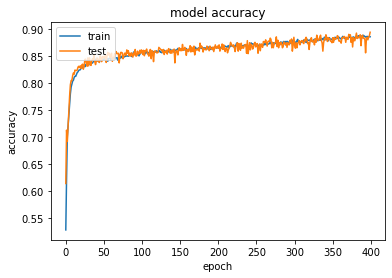

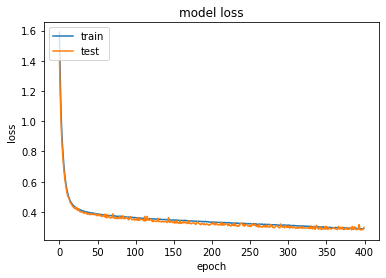

In [27]:
History=M.fit(X_train,Y_train,
              epochs=400,
              batch_size=25,
              validation_data=(X_test,Y_test))

Show_History(History)